In [1]:
# import necessary library
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# load dataset
df = pd.read_csv("/kaggle/input/data-wisatawan-mancanegara-di-indonesia/Data Wisatawan Mancanegara di Indonesia.csv", encoding='windows-1252')
df.head()

,Kebangsaan,Jumlah Kunjungan,Tahun,Avg Lama Kunjungan,Avg Pengeluaran,Kelompok Negara
0,Brunei Darussalam,19796,2024,6.78,1064.9,ASEAN
1,Malaysia,2278281,2024,3.29,693.07,ASEAN
2,Filipina,239714,2024,3.57,1005.25,ASEAN
3,Singapura,1408015,2024,3.07,707.69,ASEAN
4,Thailand,119664,2024,3.78,1107.35,ASEAN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kebangsaan          1045 non-null   object
 1   Jumlah Kunjungan    1045 non-null   object
 2   Tahun               1045 non-null   int64 
 3   Avg Lama Kunjungan  612 non-null    object
 4   Avg Pengeluaran     612 non-null    object
 5   Kelompok Negara     1045 non-null   object
dtypes: int64(1), object(5)
memory usage: 49.1+ KB


In [4]:
df.rename(columns={"Kebangsaan":"country", "Jumlah Kunjungan":"total_visits", "Tahun ":'year', "Avg Lama Kunjungan":'avg_length_stay', "Avg Pengeluaran":'avg_spending', "Kelompok Negara":'country_group'}, inplace=True)

In [5]:
print(df.columns)

Index(['country', 'total_visits', 'year', 'avg_length_stay', 'avg_spending',
       'country_group'],
      dtype='object')


In [6]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['total_visits'] = pd.to_numeric(df['total_visits'], errors='coerce')
df['avg_length_stay'] = pd.to_numeric(df['avg_length_stay'], errors='coerce')
df['avg_spending'] = pd.to_numeric(df['avg_spending'], errors='coerce')

In [7]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,country,total_visits,year,avg_length_stay,avg_spending,country_group
count,1045,1.019000e+03,1045,610.000000,544.000000,1045
unique,55,NaN,NaN,NaN,NaN,7
top,Brunei Darussalam,NaN,NaN,NaN,NaN,Eropa
freq,19,NaN,NaN,NaN,NaN,323
mean,NaN,1.655121e+05,2015-01-01 02:31:34.736841984,11.608131,1529.050312,NaN
min,NaN,3.500000e+01,2006-01-01 00:00:00,0.430000,474.800000,NaN
25%,NaN,1.173050e+04,2010-01-01 00:00:00,7.090000,1065.402500,NaN
50%,NaN,3.867900e+04,2015-01-01 00:00:00,11.350000,1422.840000,NaN
75%,NaN,1.552705e+05,2020-01-01 00:00:00,14.145000,1709.507500,NaN
max,NaN,2.980753e+06,2024-01-01 00:00:00,61.680000,20000.700000,NaN


In [8]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

avg_spending       47.942584
avg_length_stay    41.626794
total_visits        2.488038
country             0.000000
year                0.000000
country_group       0.000000
dtype: float64

In [9]:
columns_with_nan = ['avg_spending', 'avg_length_stay', 'total_visits']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_spending', ylabel='Count'>

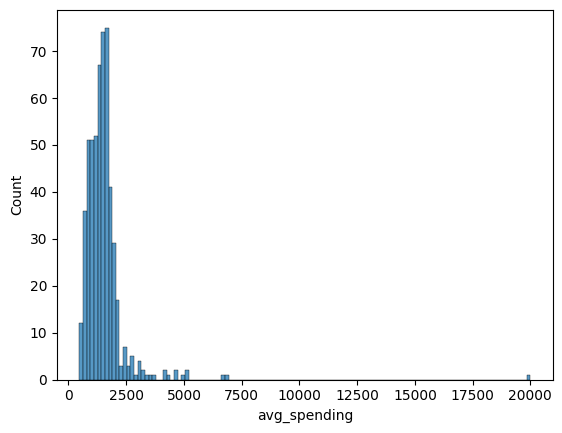

In [10]:
sns.histplot(data=df, x='avg_spending')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='avg_length_stay', ylabel='Count'>

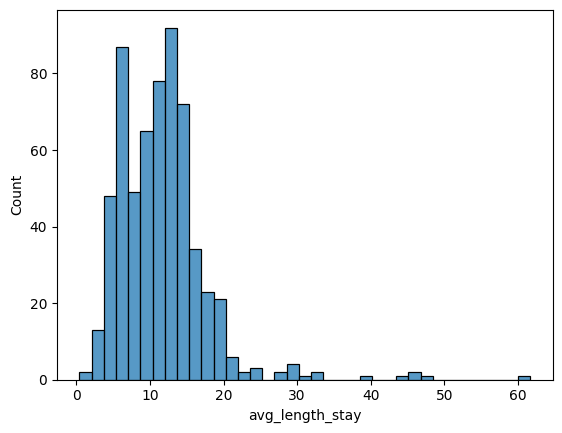

In [11]:
sns.histplot(data=df, x='avg_length_stay')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_visits', ylabel='Count'>

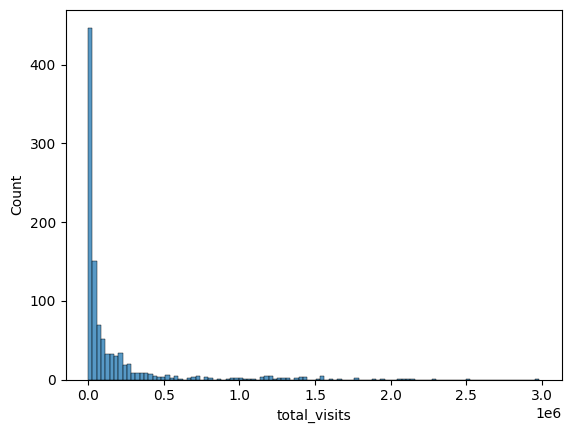

In [12]:
sns.histplot(data=df, x='total_visits')

In [13]:
# DataFrame without null values
df_no_nulls = df.dropna()

# DataFrame with null values
df_with_nulls = df[df.isnull().any(axis=1)]

In [14]:
# Fill the null columns
df['total_visits'] = df['total_visits'].fillna(df['total_visits'].median())
df['avg_length_stay'] = df['avg_length_stay'].fillna(df['avg_length_stay'].median())
df['avg_spending'] = df['avg_spending'].fillna(df['avg_spending'].median())

**Check covariance with data median and data without null**

In [15]:
np.cov(df['avg_length_stay'], df['avg_spending'])

array([[2.21726211e+01, 8.45384847e+02],
       [8.45384847e+02, 5.95795832e+05]])

In [16]:
np.cov(df_no_nulls['avg_length_stay'], df_no_nulls['avg_spending'])

array([[3.03690094e+01, 1.67152061e+03],
       [1.67152061e+03, 1.14008982e+06]])

In [17]:
np.cov(df['avg_length_stay'], df['total_visits'])

array([[ 2.21726211e+01, -4.17599276e+05],
       [-4.17599276e+05,  1.17040821e+11]])

In [18]:
np.cov(df_no_nulls['avg_length_stay'], df_no_nulls['total_visits'])

array([[ 3.03690094e+01, -7.05907926e+05],
       [-7.05907926e+05,  1.47059218e+11]])

In [19]:
np.cov(df['avg_spending'], df['total_visits'])

array([[ 5.95795832e+05, -3.93906113e+07],
       [-3.93906113e+07,  1.17040821e+11]])

In [20]:
np.cov(df_no_nulls['avg_spending'], df_no_nulls['total_visits'])

array([[ 1.14008982e+06, -8.12899559e+07],
       [-8.12899559e+07,  1.47059218e+11]])

**Check correlation data with median and data without null**

In [21]:
df[['avg_length_stay', 'avg_spending']].corr()

,avg_length_stay,avg_spending
avg_length_stay,1.000000,0.232593
avg_spending,0.232593,1.000000


In [22]:
df_no_nulls[['avg_length_stay', 'avg_spending']].corr()

,avg_length_stay,avg_spending
avg_length_stay,1.000000,0.284071
avg_spending,0.284071,1.000000


In [23]:
df[['avg_length_stay', 'total_visits']].corr()

,avg_length_stay,total_visits
avg_length_stay,1.000000,-0.259228
total_visits,-0.259228,1.000000


In [24]:
df_no_nulls[['avg_length_stay', 'total_visits']].corr()

,avg_length_stay,total_visits
avg_length_stay,1.000000,-0.334031
total_visits,-0.334031,1.000000


In [25]:
df[['total_visits', 'avg_spending']].corr()

,total_visits,avg_spending
total_visits,1.000000,-0.149168
avg_spending,-0.149168,1.000000


In [26]:
df_no_nulls[['total_visits', 'avg_spending']].corr()

,total_visits,avg_spending
total_visits,1.000000,-0.198528
avg_spending,-0.198528,1.000000


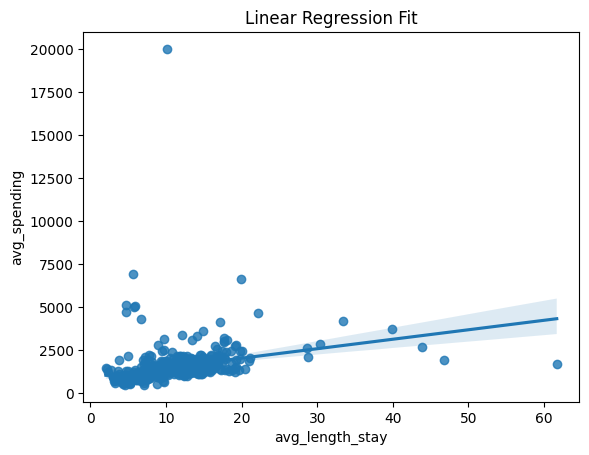

In [27]:
sns.regplot(x='avg_length_stay', y='avg_spending', data=df_no_nulls)
plt.title('Linear Regression Fit')
plt.show()

# Fit Linear Regression with outlier

In [28]:
df_no_nulls.groupby(["country_group"])[["avg_length_stay","avg_spending", "total_visits"]].mean()

,avg_length_stay,avg_spending,total_visits
country_group,,,
ASEAN,5.469639,884.240000,635378.710843
Amerika,12.342813,1645.950781,91827.187500
Asia (excl. Asean),8.447523,1160.211468,201416.871560
Eropa,13.979300,1891.596008,81599.114074
Oceania,10.931935,1566.777742,522285.548387
Timur Tengah,8.565714,1312.829286,9804.071429


In [29]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [30]:
model_lin = smf.ols("avg_spending ~ avg_length_stay + total_visits + C(country_group)", df_no_nulls)
results_lin = model_lin.fit()
results_lin_spend_leng = print_coef_std_err(results_lin)
results_lin_spend_leng

,coef,std err
Intercept,873.852005,151.389046
C(country_group)[T.Amerika],542.600721,189.313356
C(country_group)[T.Asia (excl. Asean)],150.566119,157.363759
C(country_group)[T.Eropa],754.377707,163.333962
C(country_group)[T.Oceania],557.368603,215.882284
C(country_group)[T.Timur Tengah],271.429631,299.689600
avg_length_stay,19.736012,9.598541
total_visits,-0.000154,0.000133


In [31]:
results_lin.rsquared

0.14374312547717072

# Fit Linear Regression without outlier

In [32]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df

df_no_outliers_and_null = remove_outliers_iqr(df_no_nulls, ['total_visits', 'avg_length_stay', 'avg_spending'])

In [33]:
df_no_outliers_and_null['total_visitK'] = df_no_outliers_and_null['total_visits'] / 1000

In [34]:
model_lin_2 = smf.ols("avg_spending ~ avg_length_stay + total_visitK + C(country_group)", df_no_outliers_and_null)
results_lin_2 = model_lin_2.fit()
results_lin_spend_2 = print_coef_std_err(results_lin_2)
results_lin_spend_2

,coef,std err
Intercept,654.699671,57.484121
C(country_group)[T.Amerika],427.127053,65.536273
C(country_group)[T.Asia (excl. Asean)],150.398382,53.200261
C(country_group)[T.Eropa],413.602165,61.648861
C(country_group)[T.Oceania],363.490625,88.266351
C(country_group)[T.Timur Tengah],325.383120,92.051964
avg_length_stay,38.551775,5.440646
total_visitK,0.257343,0.131865


In [35]:
results_lin_2.rsquared

0.4596104096416238

In [36]:
results_lin_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avg_spending   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     54.43
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.47e-56
Time:                        07:31:06   Log-Likelihood:                -3239.8
No. Observations:                 456   AIC:                             6496.
Df Residuals:                     448   BIC:                             6529.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                654.6997     57.484     11.389      0.000     541.728     767.672
C(country_group)[T.Amerika]              427.1271     65.536      6.517      0.000     298.330     555.924
C(country_group)[T.Asia (excl. Asean)]   150.3984     53.200      2.827      0.005      45.845     254.951
C(country_group)[T.Eropa]                413.6022     61.649      6.709      0.000     292.445     534.759
C(country_group)[T.Oceania]              363.4906     88.266      4.118      0.000     190.023     536.958
C(country_group)[T.Timur Tengah]         325.3831     92.052      3.535      0.000     144.476     506.290
avg_length_stay                           38.5518      5.441      7.086      0.000      27.859      49.244
total_visitK                               0.2573      0.132      1.952      0.052      -0.002       0.516
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.177
Skew:                           0.652   Prob(JB):                     6.33e-13
Kurtosis:                       4.120   Cond. No.                     1.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""